In [1]:
%pylab inline
import matplotlib.mlab as mlab

def q(x, y):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+28.4*g2/(0.6+28.4)


def metropolis(N, sigma):
    '''Metropolis Hastings'''
    cnt = 0
    x = np.zeros(2)
    p = q(x[0], x[1])
    samples = []
    while len(samples) < N:
        cnt += 1
        x_new = x + np.random.normal(scale=sigma, size=2)
        p_new = q(x_new[0], x_new[1])
        alpha = p_new / p
        u = np.random.uniform()
        if u < alpha: # accept
            p = p_new
            x = x_new
            samples.append(x)
        else:
            pass

    print('sigma: {}, sample trys: {}'.format(sigma, cnt))
    samples = np.array(samples)
    
    plt.figure()
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
    '''Plot target'''
    dx = 0.01
    x = np.arange(-5, 5, dx)
    y = np.arange(-5, 5, dx)
    X, Y = np.meshgrid(x, y)
    Z = q(X, Y)
    CS = plt.contour(X, Y, Z, 10)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


sigma: 0.1, sample trys: 1062


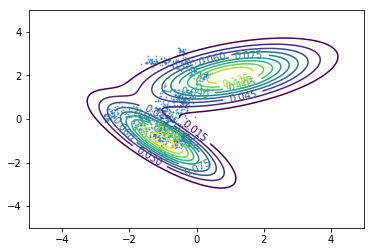

In [2]:
metropolis(1000, 0.1)

sigma: 1, sample trys: 1934


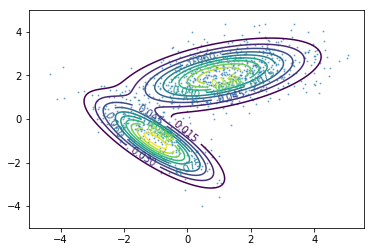

In [3]:
metropolis(1000, 1)

sigma: 10, sample trys: 35373


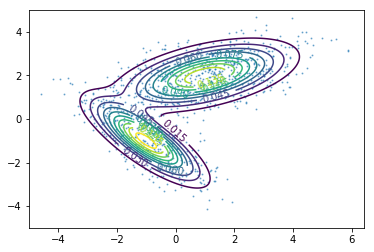

In [4]:
metropolis(1000, 10)